# Self-Driving Car Engineer Nanodegree

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from random import randint

data_root_path = '/Users/avidan/src/udacity_nd013/2017/CarND-Traffic-Sign-Classifier-Project/data/'
ts_data = data_root_path + 'traffic-signs-data/'
training_file =   ts_data + 'train.p'
validation_file = ts_data + 'valid.p'
testing_file =    ts_data + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('loaded {} train samples & {} train labels'.format(len(X_train), len(y_train)))
print('loaded {} validation samples & {} validation labels'.format(len(X_valid), len(y_valid)))
print('loaded {} test samples & {} test labels'.format(len(X_test), len(y_test)))

loaded 34799 train samples & 34799 train labels
loaded 4410 validation samples & 4410 validation labels
loaded 12630 test samples & 12630 test labels


---

## Step 1: Dataset Summary & Exploration

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.asarray(X_train[0]).shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.asarray(y_train)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
figsize=(14, 14)


def plot_samples(samples, labels, num, name=''):
    print('plotting images..')
    if num > 9:
        print('plot up to 9 figures in a line')
        num = 9
    samples_to_plot, labels_to_plot = shuffle(samples, labels)
    fig = plt.figure(figsize=figsize)
    if name != '':
        title = ('{} random {} samples'.format(int(num), name))
        
    for i in range(len(samples_to_plot[:num])):
        
        plt_pos = str(1)+str(int(num))+str(i)
        plt.subplot(plt_pos)
        plt.imshow(samples_to_plot[i])
        plt_title = 'label:'+str(labels_to_plot[i])
        plt.title(plt_title)
    fig.suptitle(title, fontsize=14) 
    fig.tight_layout()
    plt.subplots_adjust(top=1.7)

    plt.show()
    
    
    
def get_k_samples_of_each_class(samples, labels, k=None, plot=True, output=False, name=''):
    from math import sqrt
    n_classes = len(np.unique(np.asarray(labels)))
    num_of_samples, amount_each_class = [], []
    if plot:
        figsize = (12,12)
        rows = int(sqrt(n_classes))
        columns = rows + 1
        while rows*columns < n_classes:
            columns += 1
        fig = plt.figure(figsize=figsize)
    for i in range(0, n_classes):
        smaples_of_class = samples[labels == i]
        if plot:
            plt.subplot(rows,columns,i+1)
            plt.imshow(smaples_of_class[randint(0,len(smaples_of_class)-1)])
            plt.title('label:'+str(i))
            plt.axis('off')
        if k==None:
            num_of_samples.append(smaples_of_class)
        else:
            num_of_samples.append(smaples_of_class[:k])
        amount_each_class.append(len(smaples_of_class))
    if plot:
        title = 'ploting all {} {} classes'.format(n_classes, name)
        fig.suptitle(title, fontsize=14) 
        fig.tight_layout()
        plt.subplots_adjust(top=0.95)
        plt.show()
    if output:
        
        return num_of_samples, amount_each_class

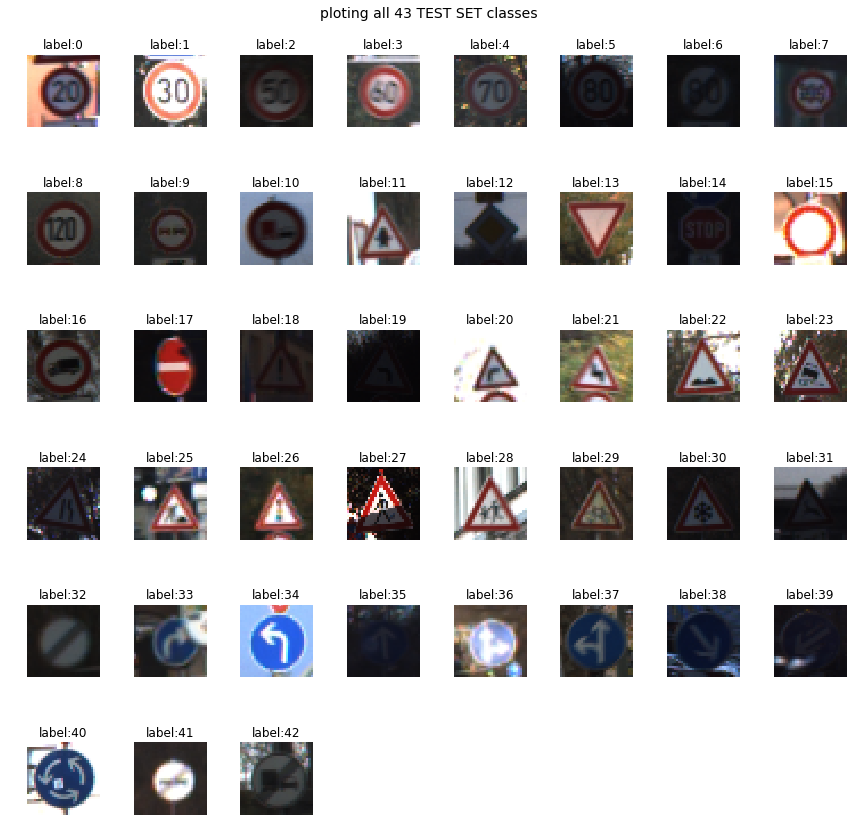

amount for each class in TEST SET:

60 samples for label 0
720 samples for label 1
750 samples for label 2
450 samples for label 3
660 samples for label 4
630 samples for label 5
150 samples for label 6
450 samples for label 7
450 samples for label 8
480 samples for label 9
660 samples for label 10
420 samples for label 11
690 samples for label 12
720 samples for label 13
270 samples for label 14
210 samples for label 15
150 samples for label 16
360 samples for label 17
390 samples for label 18
60 samples for label 19
90 samples for label 20
90 samples for label 21
120 samples for label 22
150 samples for label 23
90 samples for label 24
480 samples for label 25
180 samples for label 26
60 samples for label 27
150 samples for label 28
90 samples for label 29
150 samples for label 30
270 samples for label 31
60 samples for label 32
210 samples for label 33
120 samples for label 34
390 samples for label 35
120 samples for label 36
60 samples for label 37
690 samples for label 38
90 sampl

In [4]:
_, amount_each = get_k_samples_of_each_class(X_test, y_test, k=5, name='TEST SET', output=True)
smallest_class = np.argmin(amount_each)
largest_class = np.argmax(amount_each)
print('amount for each class in TEST SET:\n')
for i in range(len(amount_each)):
    print('{} samples for label {}'.format(amount_each[i], i))
    
print('samllest class {} with {} samples'.format(smallest_class, amount_each[smallest_class]))
print('largest class {} with {} samples'.format(largest_class, amount_each[largest_class]))
print('total test samples: ', sum(amount_each))

In [5]:
samples_per_class, amount_each = get_k_samples_of_each_class(
    X_train, y_train, plot=False, name='TRAIN SET', output=True)
smallest_class = np.argmin(amount_each)
largest_class = np.argmax(amount_each)
print('amount for each class in TRAIN SET:\n')
for i in range(0,len(amount_each)):    
    print('{} samples for label {}'.format(
        amount_each[i], i))
    
print('samllest class {} with {} samples'.format(smallest_class, amount_each[smallest_class]))
print('largest class {} with {} samples'.format(largest_class, amount_each[largest_class]))
print('total train samples: ', sum(amount_each))

amount for each class in TRAIN SET:

180 samples for label 0
1980 samples for label 1
2010 samples for label 2
1260 samples for label 3
1770 samples for label 4
1650 samples for label 5
360 samples for label 6
1290 samples for label 7
1260 samples for label 8
1320 samples for label 9
1800 samples for label 10
1170 samples for label 11
1890 samples for label 12
1920 samples for label 13
690 samples for label 14
540 samples for label 15
360 samples for label 16
990 samples for label 17
1080 samples for label 18
180 samples for label 19
300 samples for label 20
270 samples for label 21
330 samples for label 22
450 samples for label 23
240 samples for label 24
1350 samples for label 25
540 samples for label 26
210 samples for label 27
480 samples for label 28
240 samples for label 29
390 samples for label 30
690 samples for label 31
210 samples for label 32
599 samples for label 33
360 samples for label 34
1080 samples for label 35
330 samples for label 36
180 samples for label 37
1860 sam

In [131]:
# import numpy as np
import cv2
from random import randint

def rotate_img(img, angle, plot=False, name=''):
    figsize=(10, 5)

    num_rows, num_cols = img.shape[:2]

    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
    if plot:
        fig = plt.figure(figsize=figsize)

        plt.subplot(121)
        plt.axis('off')
        plt.imshow(img)
        if name == '':
            title = 'original_img'
        else:
            title = name
        plt.title(title)

        plt.subplot(122)
        rot_title = title + ', rotated {} degs'.format(angle)   
        plt.imshow(rotated_img)
        plt.title(rot_title)
        fig.tight_layout()
        plt.axis('off')
        plt.show()
    return rotated_img


def crop_img(img, max_crop=10):
    shape = img.shape
    crop_side1 = randint(0,int(max_crop/2))
    crop_side2 = randint(0,int(max_crop/2))
    crop_img = img[crop_side1:shape[1]-crop_side2, crop_side1:shape[0]-crop_side2]
    resized = cv2.resize(crop_img, (32,32))
    return resized

In [7]:
X_augmented, y_augmented = [], []
for i in range(len(samples_per_class)):
#     print(len(samples_per_class[i]))
    aug_samples, extended = [], []
    label = 0
    while len(aug_samples) < amount_each[largest_class]:
        while len(extended) < amount_each[largest_class]/3:
            extended.extend(samples_per_class[i])
#         print(len(extended))
        for j in range(len(extended)):
            rot_img = rotate_img(extended[j], randint(-5,5))
            cropped_img = crop_img(extended[j])
            rot_cropped = crop_img(rotate_img(extended[j], randint(-5,5)))
            aug_samples.append(rot_img)
            aug_samples.append(cropped_img)
            aug_samples.append(rot_cropped)
            if len(aug_samples) >= amount_each[largest_class]:
                break
        aug_labels = [i]*len(aug_samples)
        if len(aug_samples) == len(aug_labels):
            print('augmented for a total of {} samples & {} labels of class:{}'.format(len(aug_samples), len(aug_labels), i))
            for samp in aug_samples:
                X_augmented.append(samp)
            y_augmented.extend(aug_labels)

augmented for a total of 2010 samples & 2010 labels of class:0
augmented for a total of 2010 samples & 2010 labels of class:1
augmented for a total of 2010 samples & 2010 labels of class:2
augmented for a total of 2010 samples & 2010 labels of class:3
augmented for a total of 2010 samples & 2010 labels of class:4
augmented for a total of 2010 samples & 2010 labels of class:5
augmented for a total of 2010 samples & 2010 labels of class:6
augmented for a total of 2010 samples & 2010 labels of class:7
augmented for a total of 2010 samples & 2010 labels of class:8
augmented for a total of 2010 samples & 2010 labels of class:9
augmented for a total of 2010 samples & 2010 labels of class:10
augmented for a total of 2010 samples & 2010 labels of class:11
augmented for a total of 2010 samples & 2010 labels of class:12
augmented for a total of 2010 samples & 2010 labels of class:13
augmented for a total of 2010 samples & 2010 labels of class:14
augmented for a total of 2010 samples & 2010 label

In [8]:
samples_per_class, amount_each = get_k_samples_of_each_class(
    np.array(X_augmented), np.array(y_augmented), name='AUGMENTED SET', output=True, plot=False)    


smallest_class = np.argmin(np.array(amount_each))
largest_class = np.argmax(np.array(amount_each))
print('amount for each class in AUGMENTED SET:\n')
for i in range(len(amount_each)):
    print('{} samples for label {}'.format(amount_each[i], i))
    
print('samllest class {} with {} samples'.format(smallest_class, amount_each[smallest_class]))
print('largest class {} with {} samples'.format(largest_class, amount_each[largest_class]))
print('total augmented samples: ', sum(amount_each))

amount for each class in AUGMENTED SET:

2010 samples for label 0
2010 samples for label 1
2010 samples for label 2
2010 samples for label 3
2010 samples for label 4
2010 samples for label 5
2010 samples for label 6
2010 samples for label 7
2010 samples for label 8
2010 samples for label 9
2010 samples for label 10
2010 samples for label 11
2010 samples for label 12
2010 samples for label 13
2010 samples for label 14
2010 samples for label 15
2010 samples for label 16
2010 samples for label 17
2010 samples for label 18
2010 samples for label 19
2010 samples for label 20
2010 samples for label 21
2010 samples for label 22
2010 samples for label 23
2010 samples for label 24
2010 samples for label 25
2010 samples for label 26
2010 samples for label 27
2010 samples for label 28
2010 samples for label 29
2010 samples for label 30
2010 samples for label 31
2010 samples for label 32
2010 samples for label 33
2010 samples for label 34
2010 samples for label 35
2010 samples for label 36
2010 sa

plotting images..


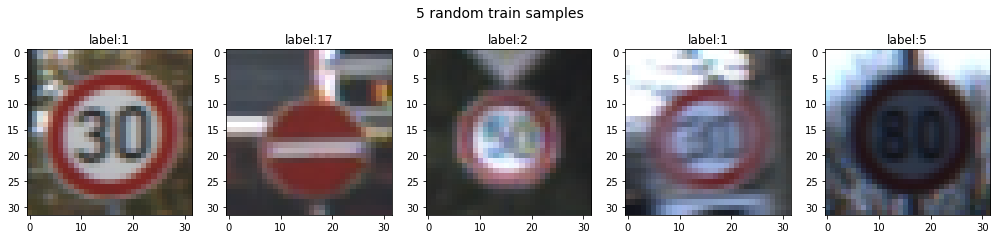

plotting images..


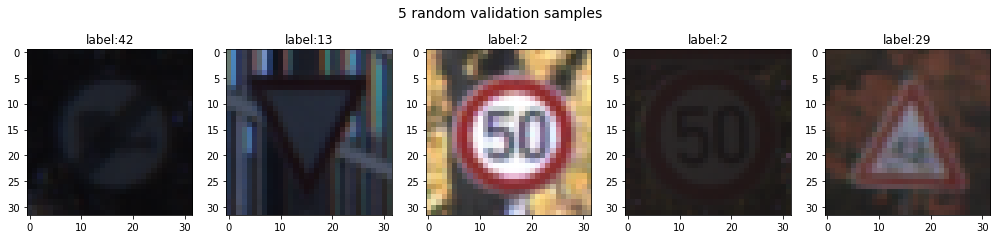

plotting images..


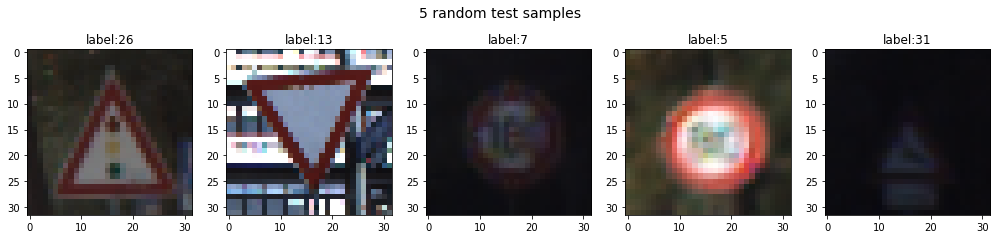

plotting images..


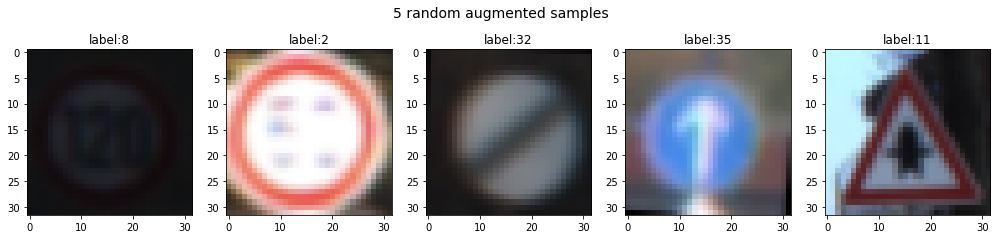

In [9]:
plot_samples(X_train, y_train, 5, name='train')
plot_samples(X_valid, y_valid, 5, name='validation')
plot_samples(X_test, y_test, 5, name='test')
plot_samples(X_augmented, y_augmented, 5, name='augmented')

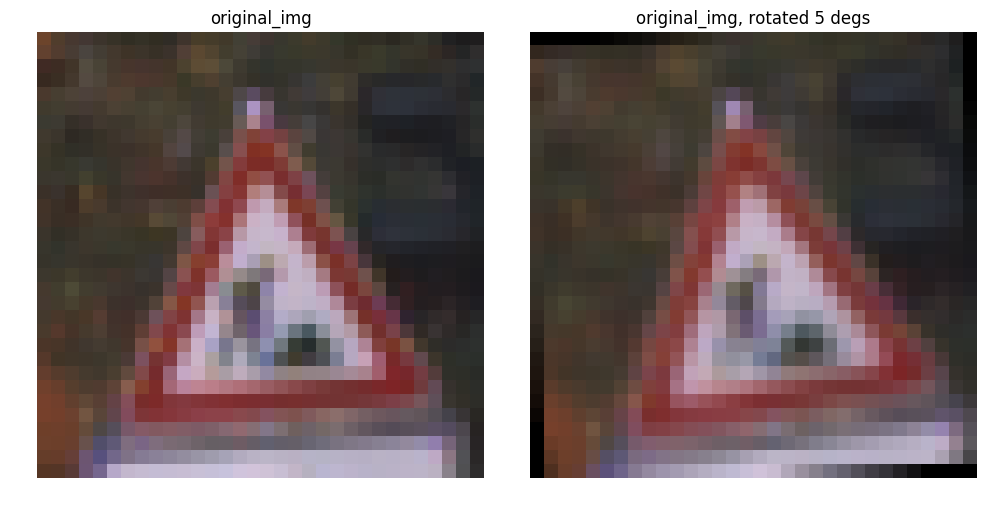

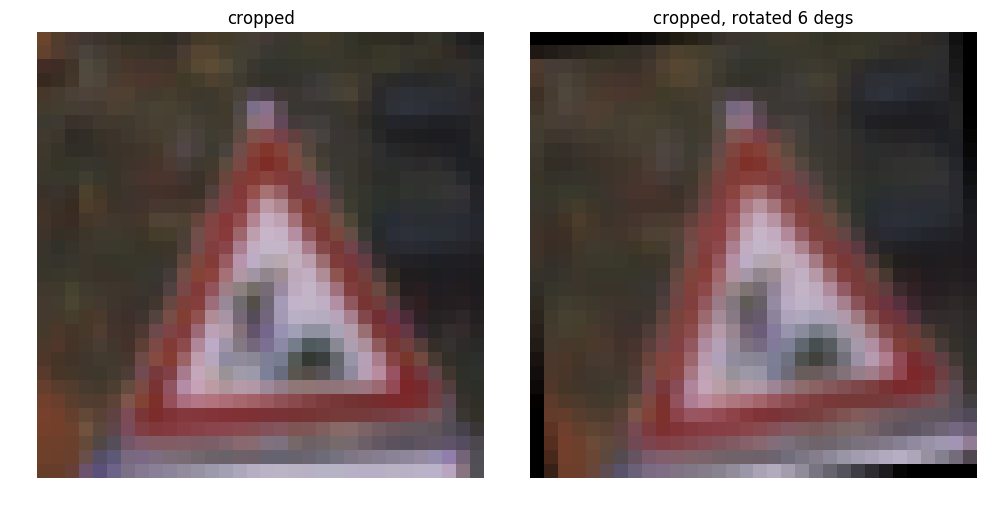

In [133]:
img = X_train[randint(0,len(X_train)-1)]
angle = randint(-10,10)
new_img = rotate_img(img, angle, plot=True)
angle = randint(-10,10)
new_cropped = rotate_img(crop_img(img), angle, plot=True, name='cropped')

----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization)

In [11]:
import tensorflow as tf

x_before_norm = tf.placeholder(tf.float32, (None, 32, 32, 3))
mean = tf.placeholder(tf.float32, (None, 32, 32, 3))
variance = tf.placeholder(tf.float32, (None, 32, 32, 3))

mean, variance = tf.nn.moments(x_before_norm, axes=[0,1,2,3], keep_dims=True)

x = tf.nn.batch_normalization(x_before_norm, mean, variance, offset=0.05, scale=0.9, variance_epsilon=0.01, name='norm')
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

### Model Architecture

In [13]:
from tensorflow.contrib.layers import flatten
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

In [14]:
rate = 0.0005

# logits = ConvNet(x, keep_prob)
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
top_5 = tf.nn.top_k(logits, 5)
top_1 = tf.nn.top_k(logits, 1)
saver = tf.train.Saver()

def evaluate(X_data, y_data, BATCH_SIZE=20):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
from sklearn.utils import shuffle

def produce_batch(samples, labels, offset, BATCH_SIZE, augment=False):
#     print('producing batch. augment = ', augment)
    
    if augment:
        batch_x, batch_y = [], []
        end = int(offset + BATCH_SIZE/4)
        slice_x, slice_y = samples[offset:end], labels[offset:end]
#         print('before_aug', len(slice_x), len(slice_y), slice_x.shape, slice_y.shape)
        for j in range(len(slice_x)):
            rot_img = rotate_img(slice_x[j], randint(-10,10))
            cropped_img = crop_img(slice_x[j])
            rot_cropped = crop_img(rotate_img(slice_x[j], randint(-10,10)))
            batch_x.append(slice_x[j])
            batch_x.append(rot_img)
            batch_x.append(cropped_img)
            batch_x.append(rot_cropped)
            batch_y.append(slice_y[j])
            batch_y.append(slice_y[j])
            batch_y.append(slice_y[j])
            batch_y.append(slice_y[j])
    else:
        end = int(offset + BATCH_SIZE)
        batch_x, batch_y = samples[offset:end], labels[offset:end]
#     print(len(batch_x), len(batch_y), np.array(batch_x).shape, np.array(batch_y).shape)
    return np.array(batch_x), np.array(batch_y)

def train_model(samples, labels, valid_samples, valid_labels, EPOCHS=10, BATCH_SIZE=20, load=True, save=True, augment=True):
    with tf.Session() as sess:
        if not load:
            sess.run(tf.global_variables_initializer())
            print('initializing a new model..')
            prev_Accuracy = 0.75
        else:
            try:
                model_path = tf.train.latest_checkpoint('./trained_models')
                saver.restore(sess, model_path)
                print('loading previously trained model')
                prev_Accuracy = float(model_path.split('/')[-1][-5:])
                print('prev_Accuracy = ', prev_Accuracy)
            except:
                print('failed to load model. initializing a new model')
                sess.run(tf.global_variables_initializer())
                print('initializing new model..')
                prev_Accuracy = 0.75
        num_examples = len(samples)
        print("Training... on {} samples. EPOCHS = {}. augment = {}".format(num_examples, EPOCHS, augment))
        print()
        
        for i in range(EPOCHS):
            samples, labels = shuffle(samples, labels)
            if augment:
                tot_batches = num_examples//(BATCH_SIZE/4)
                for offset in range(0, num_examples, int(BATCH_SIZE/4)):
                    batch_x, batch_y = produce_batch(samples, labels, offset, int(BATCH_SIZE), augment=augment)
                    batch_num = int(offset/(BATCH_SIZE/2)+1)
#                     print('batch num:{} loading {} samples'.format(batch_num,len(batch_y)))
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            else:
                tot_batches = num_examples//BATCH_SIZE
                for offset in range(0, num_examples, BATCH_SIZE):
                    batch_x, batch_y = produce_batch(samples, labels, offset, BATCH_SIZE)
                    batch_num = int(offset/BATCH_SIZE+1)
#                     print('batch num:{} loading {} samples'.format(batch_num,len(batch_y)))
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            validation_accuracy = evaluate(valid_samples, valid_labels)
            print("\nEPOCH {} ..., {} batches of size {}".format(i+1, int(tot_batches), BATCH_SIZE))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
            if save and validation_accuracy > prev_Accuracy:
                model_name = './trained_models/lenet_' +str(validation_accuracy)[:5]
                saver.save(sess, model_name)
                print("Accuracy, improved. saved to path:{}".format(model_name))
                prev_Accuracy = validation_accuracy
    print('done training.')

In [17]:
# train_model(X_train, y_train, X_valid, y_valid, EPOCHS=30, BATCH_SIZE=20, load=False, save=True, augment=True)
train_model(X_augmented, y_augmented, X_valid, y_valid, EPOCHS=10, BATCH_SIZE=40, load=False, save=True, augment=False)

initializing a new model..
Training... on 86430 samples. EPOCHS = 10. augment = False


EPOCH 1 ..., 2160 batches of size 40
Validation Accuracy = 0.759

Accuracy, improved. saved to path:./trained_models/lenet_0.759

EPOCH 2 ..., 2160 batches of size 40
Validation Accuracy = 0.827

Accuracy, improved. saved to path:./trained_models/lenet_0.826

EPOCH 3 ..., 2160 batches of size 40
Validation Accuracy = 0.856

Accuracy, improved. saved to path:./trained_models/lenet_0.856

EPOCH 4 ..., 2160 batches of size 40
Validation Accuracy = 0.864

Accuracy, improved. saved to path:./trained_models/lenet_0.863

EPOCH 5 ..., 2160 batches of size 40
Validation Accuracy = 0.850


EPOCH 6 ..., 2160 batches of size 40
Validation Accuracy = 0.870

Accuracy, improved. saved to path:./trained_models/lenet_0.869

EPOCH 7 ..., 2160 batches of size 40
Validation Accuracy = 0.875

Accuracy, improved. saved to path:./trained_models/lenet_0.875

EPOCH 8 ..., 2160 batches of size 40
Validation Accuracy = 0.873


In [18]:
#evaluate
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./trained_models'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    test_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./trained_models/lenet_0.896
Test Accuracy = 0.870
Validation Accuracy = 0.896


---

## Step 3: Test a Model on New Images

### Load and Output the Images

In [93]:
from scipy.misc import imread
import os
import cv2

GTSB_training_path = data_root_path + 'GTSRB/Final_Training/Images/'
final_test_path = data_root_path + 'GTSRB/Final_Test/Images'

def load_GTRSB_imgs (training_path, image_shape, num_of_classes=43):
    images = []
    labels = []
    for i in os.listdir(training_path):
        if i != '.DS_Store':
            path = training_path + i +'/'
#             print(path)
            for s in os.listdir(path):
                if s[-3:] == 'ppm':
                    image = imread(path + s)
                    resized = cv2.resize(image, (32,32))
                    images.append(resized)  
                    labels.append(i)
#                     print (i)
    return images, labels  

GTRSB_X, GTRSB_y = load_GTRSB_imgs(GTSB_training_path, image_shape=X_train[0].shape)
from sklearn.model_selection import train_test_split

GTRSB_X_train, GTRSB_X_test, GTRSB_y_train, GTRSB_y_test = train_test_split(GTRSB_X, GTRSB_y, test_size=0.25, random_state=42)

print('loaded {} samples & {} labels'.format(len(GTRSB_X_train), len(GTRSB_y_train)))
print('loaded {} samples & {} labels'.format(len(GTRSB_X_test), len(GTRSB_y_test)))

loaded 29406 samples & 29406 labels
loaded 9803 samples & 9803 labels


In [20]:
train_model(GTRSB_X, GTRSB_y, X_valid, y_valid, EPOCHS=5, BATCH_SIZE=40, load=True, save=True, augment=False)

INFO:tensorflow:Restoring parameters from ./trained_models/lenet_0.896
loading previously trained model
prev_Accuracy =  0.896
Training... on 39209 samples. EPOCHS = 5. augment = False


EPOCH 1 ..., 980 batches of size 40
Validation Accuracy = 0.969

Accuracy, improved. saved to path:./trained_models/lenet_0.969

EPOCH 2 ..., 980 batches of size 40
Validation Accuracy = 0.976

Accuracy, improved. saved to path:./trained_models/lenet_0.975

EPOCH 3 ..., 980 batches of size 40
Validation Accuracy = 0.988

Accuracy, improved. saved to path:./trained_models/lenet_0.987

EPOCH 4 ..., 980 batches of size 40
Validation Accuracy = 0.990

Accuracy, improved. saved to path:./trained_models/lenet_0.989

EPOCH 5 ..., 980 batches of size 40
Validation Accuracy = 0.986

done training.


In [135]:
#evaluate
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./trained_models'))
    test_accuracy = evaluate(X_test, y_test)
    print("Original Test Accuracy = {:.3f}".format(test_accuracy))
    test_accuracy = evaluate(GTRSB_X_test, GTRSB_y_test)
    print("GTRSB Test Accuracy = {:.3f}".format(test_accuracy))
    test_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./trained_models/lenet_0.989
Original Test Accuracy = 0.916
GTRSB Test Accuracy = 0.992
Validation Accuracy = 0.990


### Predict the Sign Type for Each Image

In [89]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def plot_predict_hist(predict_values, predict_labels, img, label):
    predict_sm = np.array(softmax(predict_values)*100, dtype=np.float)
    fig = plt.figure(figsize=(4,1.2))
    ax = fig.add_subplot(121)
    plt.rcdefaults()
    y_pos = np.arange(len(predict_labels))
    
    ax.barh(y_pos, predict_sm, align='center',
            color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(predict_labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('predict confidence %')
    ax.set_ylabel('predict label')
    ax.set_title('top 5 predictions (label:'+str(label)+')', fontsize=10)
    ax.set_xlim((0, 100))
    
    plt.subplot(122)
    plt.title('label:'+str(label), fontsize=12)
    plt.imshow(img)
    
    plt.show()

In [90]:
def plot_img_and_predict_hist(samples, labels, num, name=''):
    with tf.Session() as sess: 
        rand_index = randint(0,len(samples)-num)
        sam_to_plot, label_to_plot = samples[rand_index:rand_index+num], labels[rand_index:rand_index+num]
        saver.restore(sess, tf.train.latest_checkpoint('./trained_models'))
        predictions = sess.run(top_5, feed_dict={x: sam_to_plot, y: label_to_plot}) #, keep_prob: 1.0})
        count_corrects = 0
        for i in range(num):
            predict = str(predictions.indices[i][0])
            label = str(label_to_plot[i])
            if predict.zfill(6) == label.zfill(6):
                result = 'CORRECT PREDICTION :-)'
                count_corrects += 1
            else:
                result = 'WRONG PREDICTION :-('
            print('\nploting {} of {} {} samples - {}'.format(i+1, num, name, result))
            
            
            plot_predict_hist(predictions.values[i], predictions.indices[i], sam_to_plot[i], label_to_plot[i])
#             print('predict values:',np.array(predictions.values[i],dtype=np.int))
            print('predict %:',np.array(softmax(predictions.values[i])*100,dtype=np.int))
            print('predict labels:', predictions.indices[i])
        print('done. total correct predictions: {}/{}={}%'.format(count_corrects, num, count_corrects/num*100))

INFO:tensorflow:Restoring parameters from ./trained_models/lenet_0.989

ploting 1 of 5 validation samples - CORRECT PREDICTION :-)


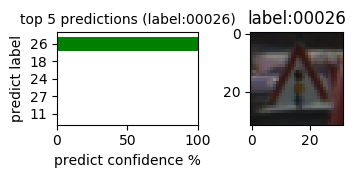

predict %: [100   0   0   0   0]
predict labels: [26 18 24 27 11]

ploting 2 of 5 validation samples - CORRECT PREDICTION :-)


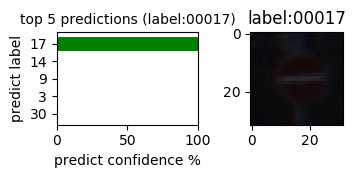

predict %: [100   0   0   0   0]
predict labels: [17 14  9  3 30]

ploting 3 of 5 validation samples - CORRECT PREDICTION :-)


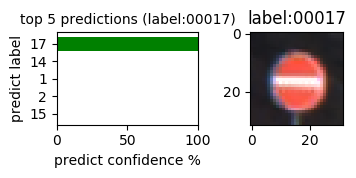

predict %: [100   0   0   0   0]
predict labels: [17 14  1  2 15]

ploting 4 of 5 validation samples - CORRECT PREDICTION :-)


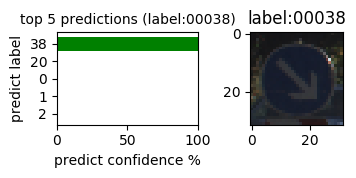

predict %: [100   0   0   0   0]
predict labels: [38 20  0  1  2]

ploting 5 of 5 validation samples - CORRECT PREDICTION :-)


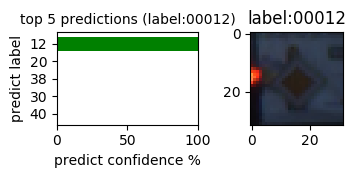

predict %: [99  0  0  0  0]
predict labels: [12 20 38 30 40]
done. total correct predictions: 5/5=100.0%


In [136]:
plot_img_and_predict_hist(GTRSB_X_test, GTRSB_y_test, 5, name='validation')

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./trained_models/lenet_0.989

ploting 1 of 5 new_images samples - CORRECT PREDICTION :-)


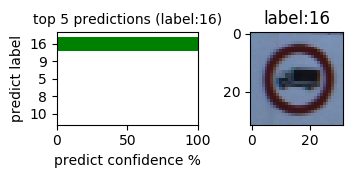

predict %: [100   0   0   0   0]
predict labels: [16  9  5  8 10]

ploting 2 of 5 new_images samples - CORRECT PREDICTION :-)


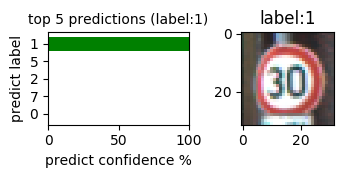

predict %: [100   0   0   0   0]
predict labels: [1 5 2 7 0]

ploting 3 of 5 new_images samples - CORRECT PREDICTION :-)


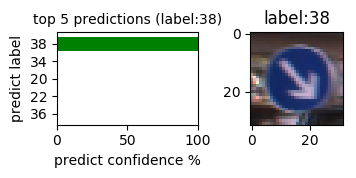

predict %: [100   0   0   0   0]
predict labels: [38 34 20 22 36]

ploting 4 of 5 new_images samples - CORRECT PREDICTION :-)


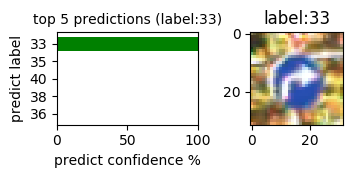

predict %: [100   0   0   0   0]
predict labels: [33 35 40 38 36]

ploting 5 of 5 new_images samples - CORRECT PREDICTION :-)


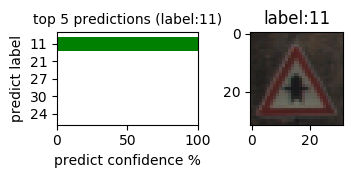

predict %: [100   0   0   0   0]
predict labels: [11 21 27 30 24]
done. total correct predictions: 5/5=100.0%


In [94]:
num_new_images = 5
from glob import glob
from os.path import join
new_images_list = glob(join(final_test_path, '*.ppm'))[:num_new_images]
images, labels = [], []
for i in new_images_list:
    image = imread(i)
    resized = cv2.resize(image, (32,32))
    images.append(resized)
labels = [16, 1, 38, 33, 11] #labels were checked & filled manually
#     plt.imshow(resized)
#     plt.show()
    
plot_img_and_predict_hist(images, labels, num_new_images, name='new_images')

### Analyze Performance

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

def get_predictions(samples):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('./trained_models'))
        predictions = sess.run(top_1, feed_dict={x: samples, keep_prob: 1.0})
        return np.array(predictions.indices, dtype=np.int).flatten()
    
def print_stats(labels, predictions):
#     cm = confusion_matrix(labels, predictions)
#     tot = cm.sum()
    
    print(classification_report(labels, predictions))

In [65]:
predictions = get_predictions(X_test)
print('predictions({}):\n'.format(len(predictions)), predictions, '\n')
print('labels({}):\n'.format(len(y_test)), y_test, '\n')

print_stats(y_test, predictions)

INFO:tensorflow:Restoring parameters from ./trained_models/lenet_0.989
predictions(12630):
 [16  1 38 ...,  3  7 10] 

labels(12630):
 [16  1 38 ...,  6  7 10] 

             precision    recall  f1-score   support

          0       0.93      0.83      0.88        60
          1       0.87      0.97      0.92       720
          2       0.94      0.93      0.93       750
          3       0.88      0.85      0.86       450
          4       0.90      0.93      0.92       660
          5       0.82      0.87      0.85       630
          6       1.00      0.78      0.88       150
          7       0.90      0.89      0.90       450
          8       0.94      0.87      0.90       450
          9       0.95      0.91      0.93       480
         10       0.98      0.97      0.98       660
         11       0.83      0.93      0.88       420
         12       0.96      0.96      0.96       690
         13       0.99      0.96      0.97       720
         14       0.99      0.98      0.98

In [66]:
predictions = get_predictions(X_valid)
print('predictions({}):\n'.format(len(predictions)), predictions, '\n')
print('labels({}):\n'.format(len(y_valid)), y_valid, '\n')

print_stats(y_valid, predictions)

INFO:tensorflow:Restoring parameters from ./trained_models/lenet_0.989
predictions(4410):
 [41 41 41 ..., 25 25 25] 

labels(4410):
 [41 41 41 ..., 25 25 25] 

             precision    recall  f1-score   support

          0       1.00      0.93      0.97        30
          1       0.98      0.99      0.98       240
          2       1.00      0.97      0.99       240
          3       0.99      0.99      0.99       150
          4       0.93      1.00      0.97       210
          5       0.99      1.00      1.00       210
          6       1.00      1.00      1.00        60
          7       0.96      0.99      0.97       150
          8       1.00      0.90      0.95       150
          9       1.00      1.00      1.00       150
         10       1.00      1.00      1.00       210
         11       0.98      0.99      0.99       150
         12       1.00      1.00      1.00       210
         13       1.00      1.00      1.00       240
         14       1.00      1.00      1.00  